In [1]:
import mpmath as mpm
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams["figure.dpi"] = 150

from qiskit import QuantumCircuit
from qiskit import Aer,execute, QuantumRegister,ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.exceptions import QiskitError

from qiskit import IBMQ
from qiskit import transpile
from qiskit.tools.monitor import job_monitor

from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter,MeasurementFilter)

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import DensityMatrix, Statevector
from qiskit.quantum_info import state_fidelity
import qiskit.ignis.mitigation.measurement as mc

from collections import Counter

from FPG import * # The functions from FP Grover Implementation notebook
import measfilter as mf # package for measurement error filter

In [2]:
def post_select(counts):
    post_counts = {}
    for key,value in counts.items():
        if key[2] == '0':
            post_counts[key[0:2]] = value
    return post_counts

In [3]:
n = 2 # Number of qubits, does not include the last ancillary qubit
indices_to_mark = 3 # An interger from 0 to 2**n

In [4]:
itr_counts = []
legends = []

for itr in range(1,5,1):
    raw_counts = Counter(np.loadtxt('FPData/n{:d}t{:d}itr{:d}.csv'.format(n, indices_to_mark, itr), dtype=str))
    itr_counts.append(post_select(raw_counts))
    legends.append("{:d} Itrs".format(itr))

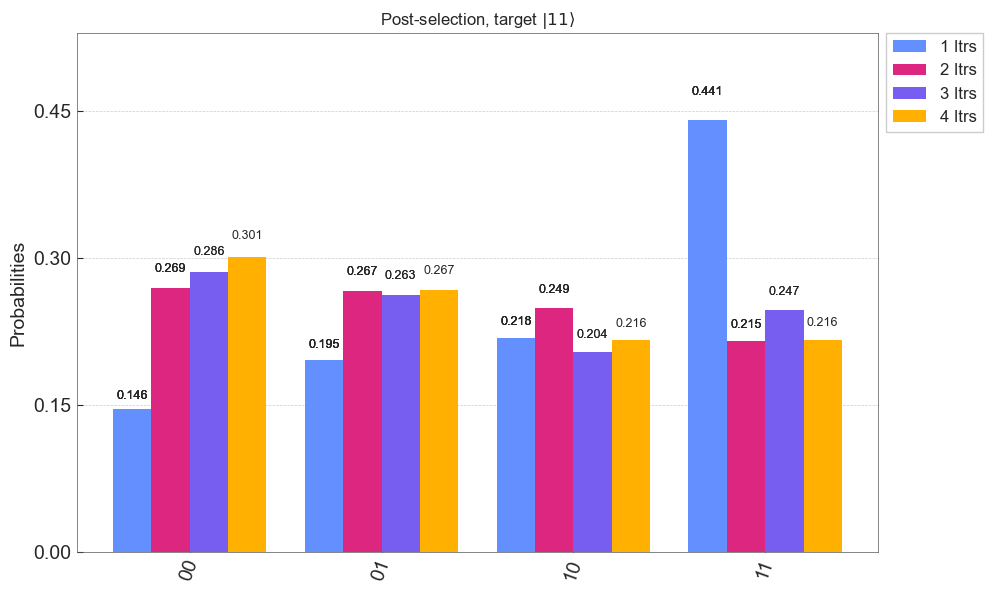

In [11]:
# , title=r"Post-selection based the ancilla qubit, target $|11\rangle$"
fig = plot_histogram(itr_counts, legend=legends, title=r"Post-selection, target $|11\rangle$", figsize=(10,6))
fig.tight_layout()
fig.savefig("FP_Grover_Real.pdf")
fig

In [6]:
file_address = 'Noise/'
CB_filter = mf.MeasFilter([3,1,4], file_address=file_address)
# CB_filter.inference(nPrior=40000, Priod_sd=0.1, seed=127, shots_per_point=1024*2)
CB_filter.post_from_file()

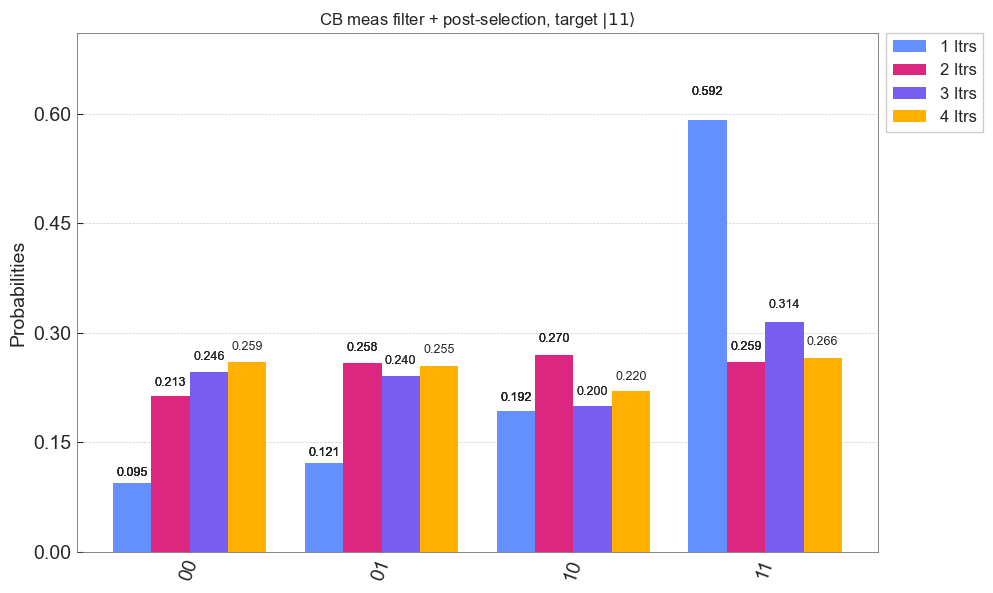

In [12]:
CB_filtered_counts = []
for itr in range(1,5,1):
    raw_counts = Counter(np.loadtxt('FPData/n{:d}t{:d}itr{:d}.csv'.format(n, indices_to_mark, itr), dtype=str))
    CB_filtered_counts.append(post_select(CB_filter.filter_mean(raw_counts)))
    
# , title=r"CB meas filter + post-selection, target $|11\rangle$"
fig = plot_histogram(CB_filtered_counts, legend=legends, title=r"CB meas filter + post-selection, target $|11\rangle$", figsize=(10,6))
fig.tight_layout()
fig.savefig("FP_Grover_Real_CB.pdf")
fig

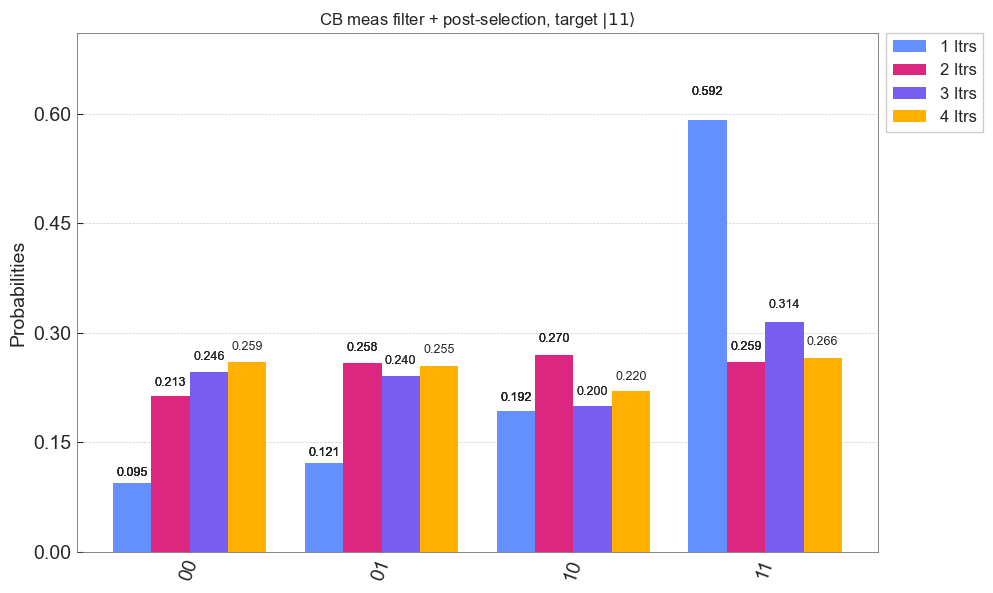

In [13]:
CB_filtered_counts = []
for itr in range(1,5,1):
    raw_counts = Counter(np.loadtxt('FPData/n{:d}t{:d}itr{:d}.csv'.format(n, indices_to_mark, itr), dtype=str))
    CB_filtered_counts.append(post_select(CB_filter.filter_mean(raw_counts)))
    
fig = plot_histogram(CB_filtered_counts, legend=legends, title=r"CB meas filter + post-selection, target $|11\rangle$", figsize=(10,6))
fig.tight_layout()
fig.savefig("FP_Grover_Real_CB.pdf")
fig